In [ ]:
# Defines the list of input files
input_files = ['col_mat_nuw_output.csv', 'mon_kur_jaf_output.csv', 'kan_output.csv']

**Task 1**

In [ ]:
import pandas as pd

# Defines column names
columns = ['HCHO reading', 'Location', 'Current Date', 'Next Date']

# Iterates over each input file
for file_name in input_files:
    # Reads the CSV file with no header
    df = pd.read_csv(file_name, header=None)

    # Adds column names
    df.columns = columns

    # Groups the data by city
    grouped_data = df.groupby('Location')

    # Iterates over each group (city)
    for city, city_data in grouped_data:
        # Defines the output file name based on the city
        output_file = f"{city.replace(',', '_').replace(' ', '_')}.csv"

        # Saves the city data to a separate CSV file
        city_data.to_csv(output_file, index=False)

In [1]:
# Lists of file names
file_names = ['Colombo_Proper', 'Deniyaya__Matara', 'Nuwara_Eliya_Proper', 'Bibile__Monaragala',
              'Kurunegala_Proper', 'Jaffna_Proper', 'Kandy_Proper']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Iterates over each input file
for file_name in file_names:
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")

    # Calculates the mean HCHO reading for the city
    city_mean = df['HCHO reading'].mean()

    # Fills empty HCHO readings with the mean of the city
    df['HCHO reading'].fillna(city_mean, inplace=True)

    # Saves the preprocessed data back to the same CSV file
    df.to_csv(f"{file_name}.csv", index=False)

In [ ]:
# Iterates over each input file
for file_name in file_names:
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")

    # Replaces negative HCHO readings with NaN
    df.loc[df['HCHO reading'] < 0, 'HCHO reading'] = float('NaN')

    # Calculates the mean HCHO reading for the city
    city_mean = df['HCHO reading'].mean()

    # Fills NaN values with the mean of the city
    df['HCHO reading'].fillna(city_mean, inplace=True)

    # Saves the preprocessed data back to the same CSV file
    df.to_csv(f"{file_name}.csv", index=False)

In [ ]:
# Sets up the figure and axes
fig, axes = plt.subplots(len(file_names), 1, figsize=(10, 6 * len(file_names)))

# Iterates over each input file
for i, file_name in enumerate(file_names):
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")

    # Plots the normal distribution graph
    sns.histplot(df['HCHO reading'], kde=True, ax=axes[i], color='skyblue', stat='density')
    axes[i].set_title(f"Normal Distribution of HCHO Reading in {file_name}")
    axes[i].set_xlabel('HCHO Reading')
    axes[i].set_ylabel('Density')

    # Calculates mean and standard deviation for z-score calculation
    mean = df['HCHO reading'].mean()
    std_dev = df['HCHO reading'].std()

    # Adds vertical lines for mean and 3 standard deviations
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2e}')
    axes[i].axvline(mean + 3 * std_dev, color='green', linestyle='--', label='+3 SD')
    axes[i].axvline(mean - 3 * std_dev, color='green', linestyle='--', label='-3 SD')

    # Adds legend
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Threshold for identifying outliers
threshold = 3

# Iterates over each input file
for file_name in file_names:
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")

    # Identifys outliers based on z-score
    z_scores = np.abs((df['HCHO reading'] - df['HCHO reading'].mean()) / df['HCHO reading'].std())

    # Drops records with z-scores beyond the threshold
    df = df[z_scores <= threshold]

    # Saves the filtered data back to the same CSV file
    df.to_csv(f"{file_name}.csv", index=False)

In [ ]:
# Sets up the figure and axes
fig, axes = plt.subplots(len(file_names), 1, figsize=(10, 6 * len(file_names)))

# Iterates over each input file
for i, file_name in enumerate(file_names):
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")

    # Plots the normal distribution graph
    sns.histplot(df['HCHO reading'], kde=True, ax=axes[i], color='skyblue', stat='density')
    axes[i].set_title(f"Normal Distribution of HCHO Reading in {file_name}")
    axes[i].set_xlabel('HCHO Reading')
    axes[i].set_ylabel('Density')

    # Calculates mean and standard deviation for z-score calculation
    mean = df['HCHO reading'].mean()
    std_dev = df['HCHO reading'].std()

    # Adds vertical lines for mean and 3 standard deviations
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2e}')
    axes[i].axvline(mean + 3 * std_dev, color='green', linestyle='--', label='+3 SD')
    axes[i].axvline(mean - 3 * std_dev, color='green', linestyle='--', label='-3 SD')

    # Adds legend
    axes[i].legend()

plt.tight_layout()
plt.show()

In [3]:
# Lists to store DataFrames for each city
dfs = []

# Iterates over each input file
for file_name in file_names:
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")
    # Appends DataFrame to the list
    dfs.append(df)

# Concatenates DataFrames into one
sri_lanka_df = pd.concat(dfs, ignore_index=True)

# Saves the combined DataFrame to a CSV file
sri_lanka_df.to_csv("sri_lanka.csv", index=False)

In [4]:
# Lists to store city-wise statistics
city_stats = []

# Iterates over each input file
for file_name in file_names:
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")

    # Calculates city-wise statistics
    city_mean = df['HCHO reading'].mean()
    city_median = df['HCHO reading'].median()
    city_std = df['HCHO reading'].std()

    # Appends city-wise statistics to the list
    city_stats.append({'City': file_name, 'Mean': city_mean, 'Median': city_median, 'Standard Deviation': city_std})

# Creates DataFrame for city-wise statistics
city_stats_df = pd.DataFrame(city_stats)

# Displays city-wise statistics
print("City-wise statistics:")
print(city_stats_df)

City-wise statistics:
                  City      Mean    Median  Standard Deviation
0       Colombo_Proper  0.000161  0.000159            0.000071
1     Deniyaya__Matara  0.000096  0.000092            0.000042
2  Nuwara_Eliya_Proper  0.000090  0.000088            0.000032
3   Bibile__Monaragala  0.000131  0.000126            0.000053
4    Kurunegala_Proper  0.000136  0.000134            0.000056
5        Jaffna_Proper  0.000110  0.000109            0.000053
6         Kandy_Proper  0.000112  0.000106            0.000047


In [5]:
# Reads the Sri Lanka CSV file
sri_lanka_df = pd.read_csv("sri_lanka.csv")

# Calculates mean, median, and standard deviation
sri_lanka_mean = sri_lanka_df['HCHO reading'].mean()
sri_lanka_median = sri_lanka_df['HCHO reading'].median()
sri_lanka_std = sri_lanka_df['HCHO reading'].std()

# Displays statistics for Sri Lanka
print("Statistics for Sri Lanka:")
print(f"Mean: {sri_lanka_mean}")
print(f"Median: {sri_lanka_median}")
print(f"Standard Deviation: {sri_lanka_std}")

Statistics for Sri Lanka:
Mean: 0.00011958684444212941
Median: 0.0001088086650368
Standard Deviation: 5.650586458696339e-05


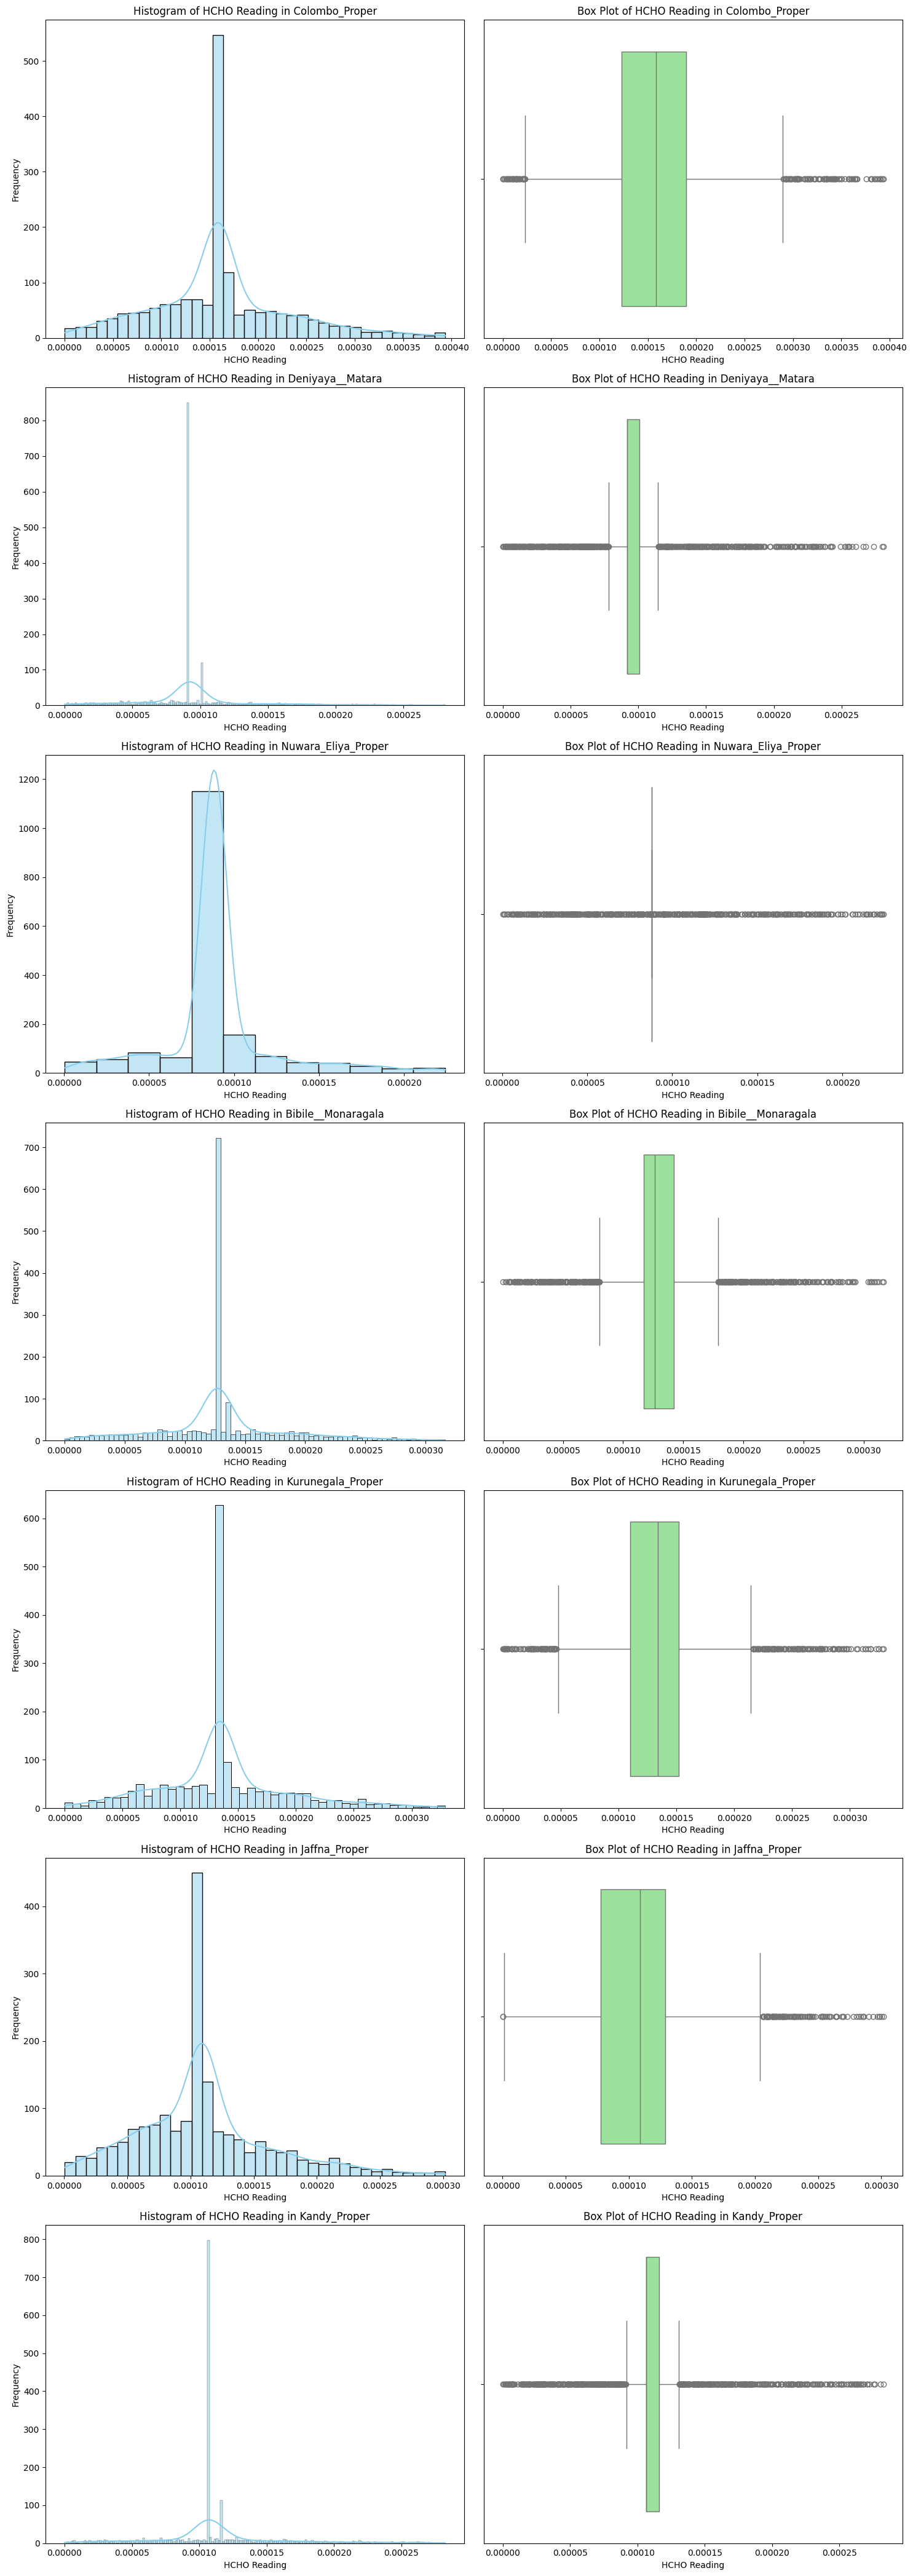

In [3]:
# Sets up subplots for histograms and box plots
fig, axes = plt.subplots(len(file_names), 2, figsize=(15, 6 * len(file_names)))

# Iterates over each input file
for i, file_name in enumerate(file_names):
    # Reads the CSV file
    df = pd.read_csv(f"{file_name}.csv")

    # Plots histogram
    sns.histplot(df['HCHO reading'], kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f"Histogram of HCHO Reading in {file_name}")
    axes[i][0].set_xlabel('HCHO Reading')
    axes[i][0].set_ylabel('Frequency')

    # Plots box plot
    sns.boxplot(data=df, x='HCHO reading', ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f"Box Plot of HCHO Reading in {file_name}")
    axes[i][1].set_xlabel('HCHO Reading')
    axes[i][1].set_ylabel('')

plt.tight_layout()
plt.show()

**Task 2**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lists of file names
file_names = ['Colombo_Proper', 'Deniyaya__Matara', 'Nuwara_Eliya_Proper', 'Bibile__Monaragala',
              'Kurunegala_Proper', 'Jaffna_Proper', 'Kandy_Proper']

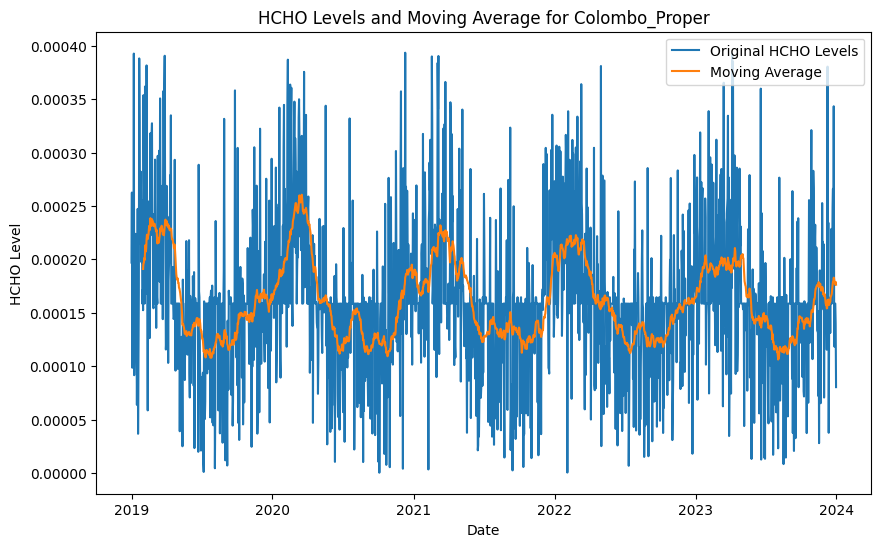

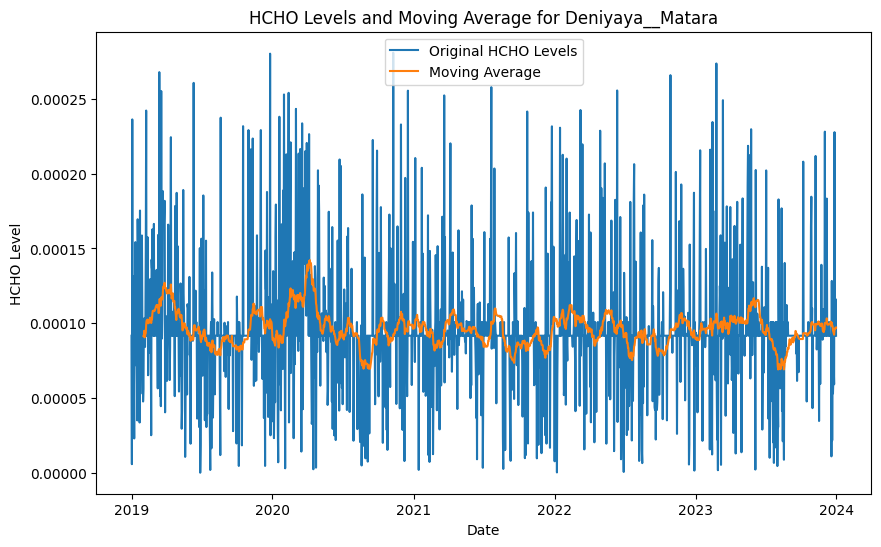

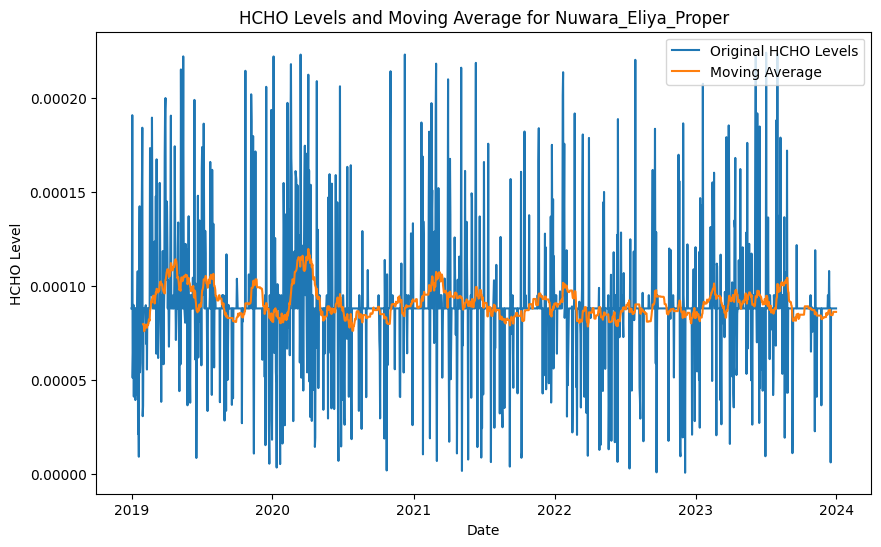

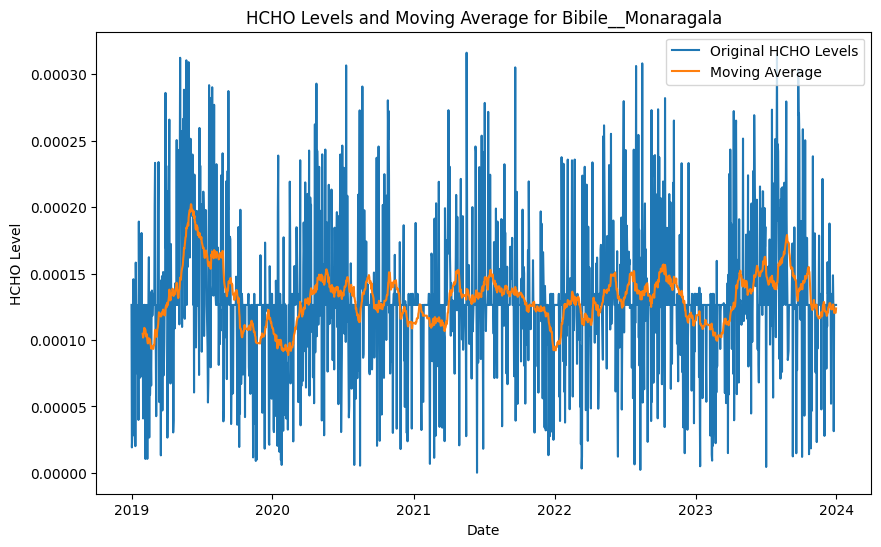

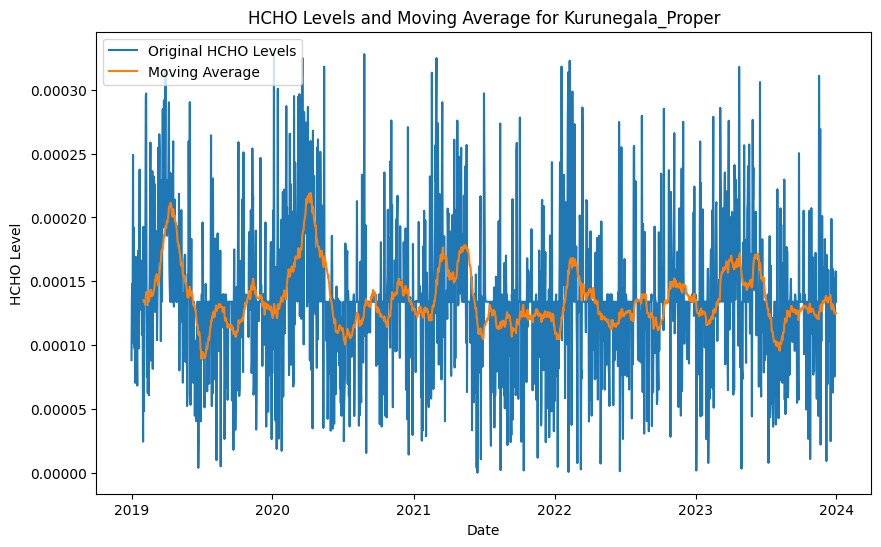

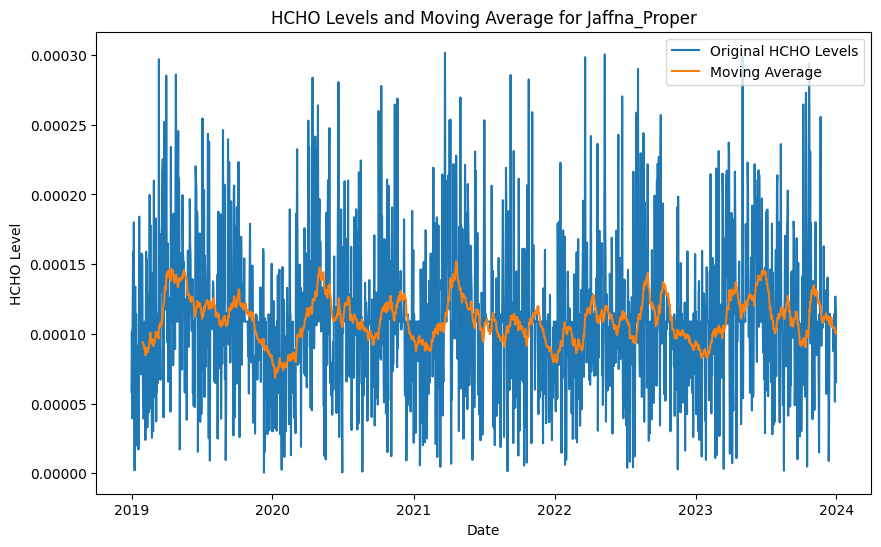

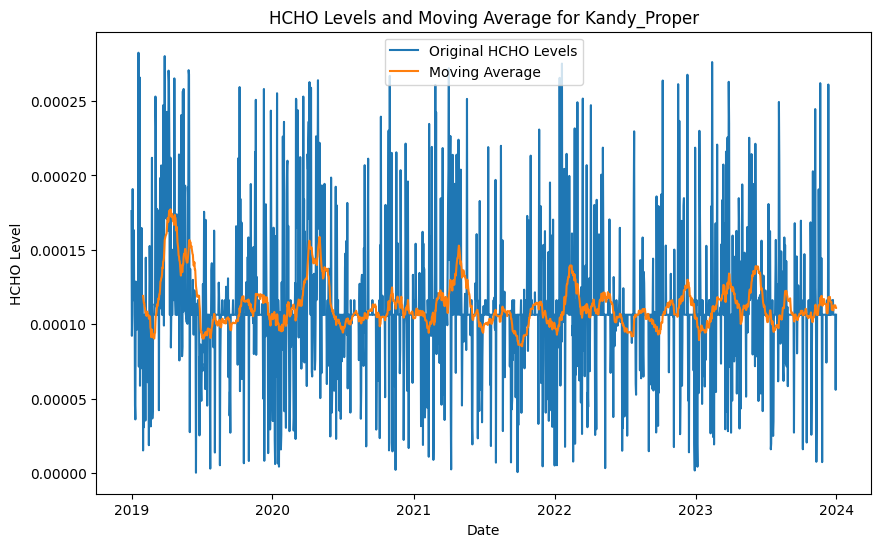

In [ ]:
# Defines a function to calculate moving averages
def calculate_moving_average(data, window):
    return data.rolling(window=window).mean()

# Iterates over each city
for city in file_names:
    # Reads the CSV file for the current city
    df = pd.read_csv(f"{city}.csv")

    # Converts 'Current Date' column to datetime
    df['Current Date'] = pd.to_datetime(df['Current Date'])

    # Sets 'Current Date' column as the index
    df.set_index('Current Date', inplace=True)

    # Calculates moving average for HCHO levels
    df['HCHO_MA'] = calculate_moving_average(df['HCHO reading'], window=30)

    # Plots original HCHO levels and moving averages
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['HCHO reading'], label='Original HCHO Levels')
    plt.plot(df.index, df['HCHO_MA'], label='Moving Average')
    plt.title(f'HCHO Levels and Moving Average for {city}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Level')
    plt.legend()
    plt.show()

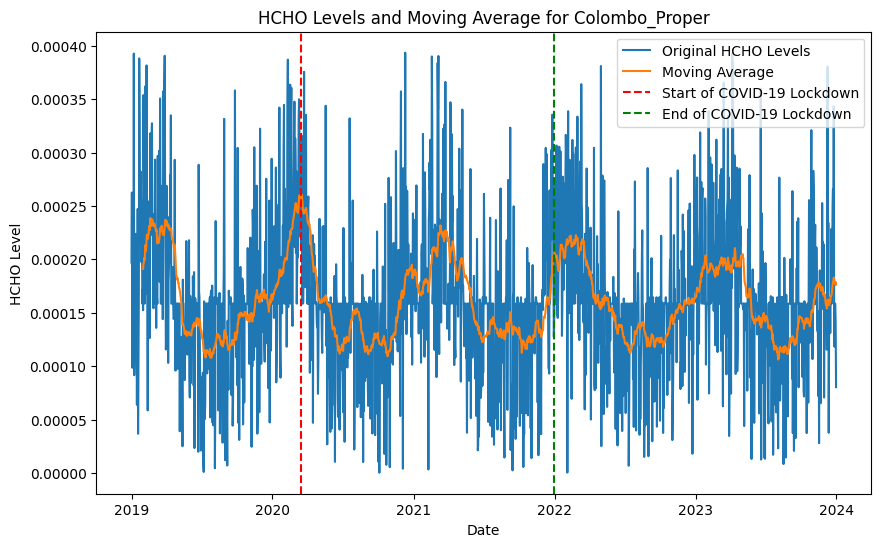

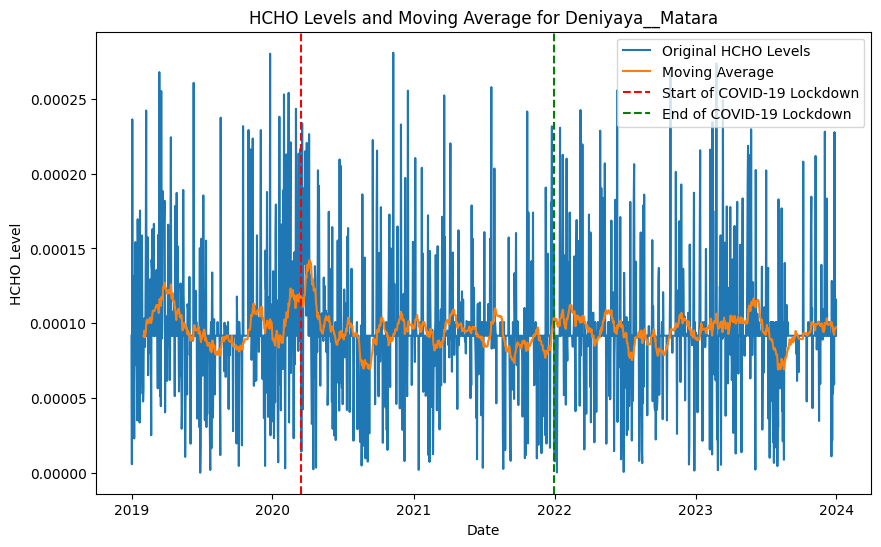

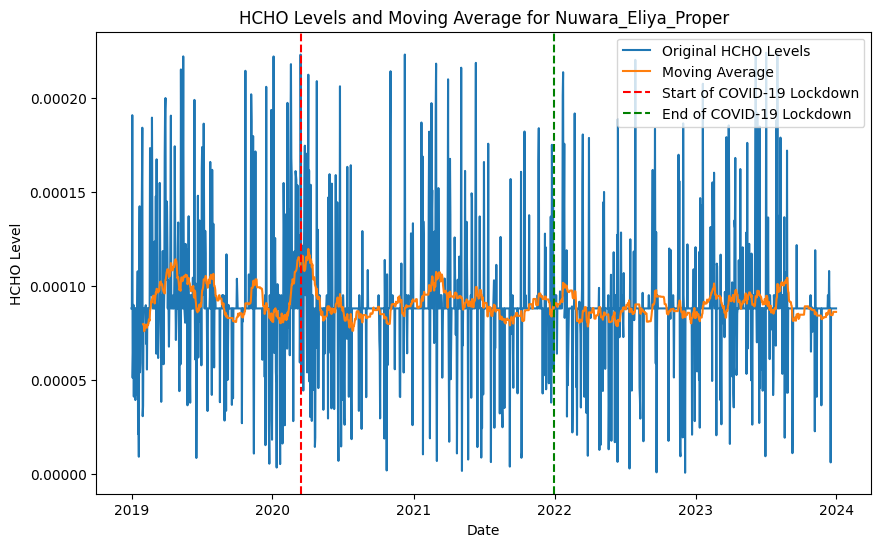

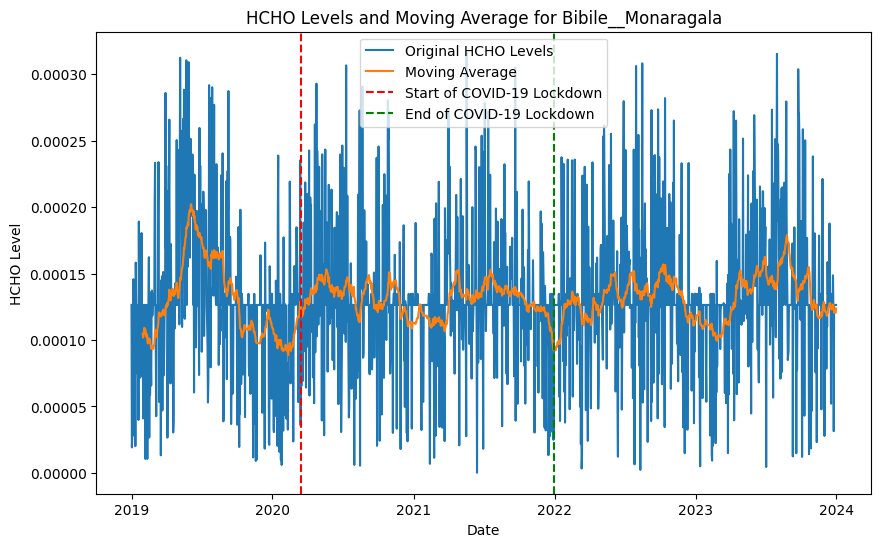

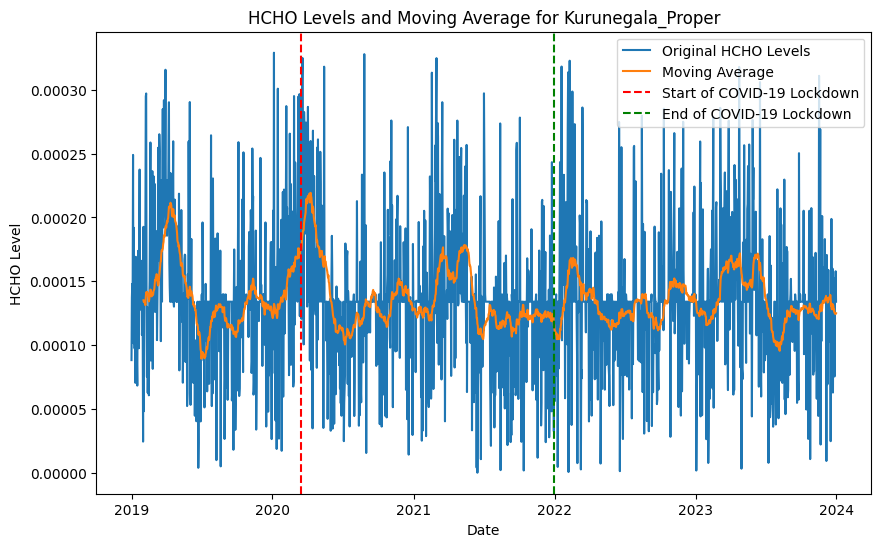

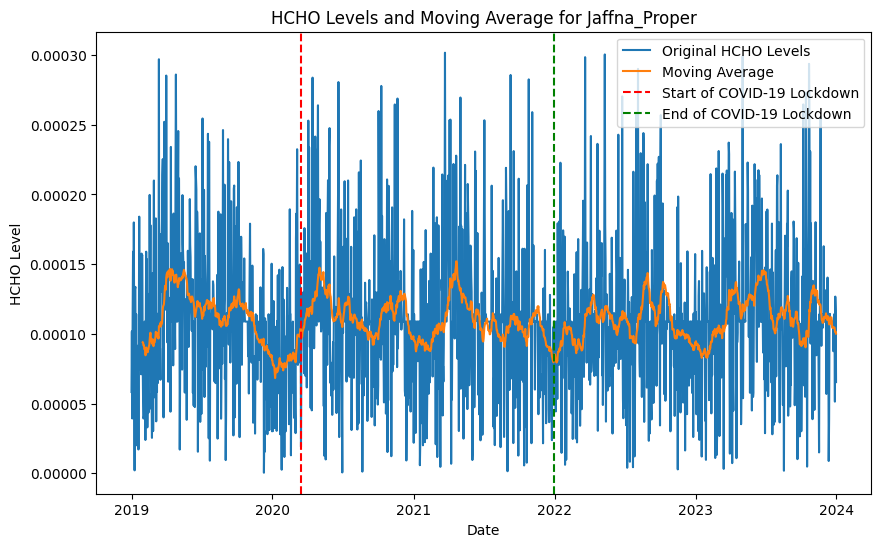

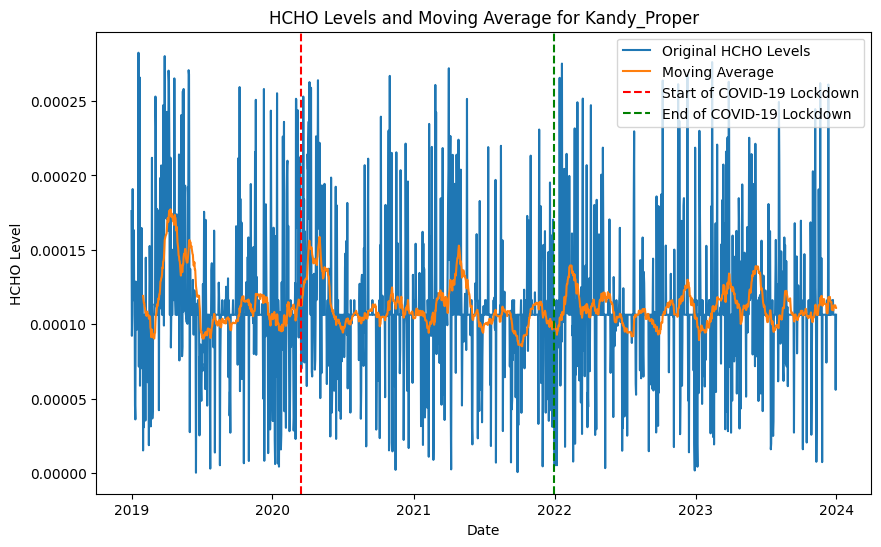

In [ ]:
# Defines a function to calculate moving averages
def calculate_moving_average(data, window):
    return data.rolling(window=window).mean()

# Iterates over each city
for city in file_names:
    # Defines the lockdown period (example dates)
    lockdown_start_date = pd.to_datetime('2020-03-15')
    lockdown_end_date = pd.to_datetime('2021-12-31')

    # Reads the CSV file for the current city
    df = pd.read_csv(f"{city}.csv")

    # Converts 'Current Date' column to datetime
    df['Current Date'] = pd.to_datetime(df['Current Date'])

    # Sets 'Current Date' column as the index
    df.set_index('Current Date', inplace=True)

    # Calculates moving average for HCHO levels
    df['HCHO_MA'] = calculate_moving_average(df['HCHO reading'], window=30)

    # Plots original HCHO levels and moving averages
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['HCHO reading'], label='Original HCHO Levels')
    plt.plot(df.index, df['HCHO_MA'], label='Moving Average')
    plt.title(f'HCHO Levels and Moving Average for {city}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Level')

    # Adds vertical lines for the start and end of COVID-19 lockdown period
    plt.axvline(lockdown_start_date, color='r', linestyle='--', label='Start of COVID-19 Lockdown')
    plt.axvline(lockdown_end_date, color='g', linestyle='--', label='End of COVID-19 Lockdown')

    plt.legend()
    plt.show()

In [ ]:
# Reads the dataset
df = pd.read_csv("weather_data.csv")

# Groups the data by city and calculate the rounded mean of TMIN, TMAX, and PRCP
city_means = df.groupby('NAME')[['TMIN', 'TMAX', 'PRCP']].mean().reset_index()
city_means['PRCP'] = city_means['PRCP'].round(2)  # Round PRCP mean to 2 decimal places

# Rounds TMIN and TMAX mean to the nearest whole number
city_means['TMIN'] = city_means['TMIN'].round()
city_means['TMAX'] = city_means['TMAX'].round()

# Merges the city means back to the original dataset
df = pd.merge(df, city_means, on='NAME', suffixes=('', '_MEAN'))

# Fills missing TMIN, TMAX, and PRCP values with the corresponding city means
df['TMIN'].fillna(df['TMIN_MEAN'], inplace=True)
df['TMAX'].fillna(df['TMAX_MEAN'], inplace=True)
df['PRCP'].fillna(df['PRCP_MEAN'], inplace=True)

# Drops the temporary mean columns
df.drop(columns=['TMIN_MEAN', 'TMAX_MEAN', 'PRCP_MEAN'], inplace=True)

df['NAME'] = df['NAME'].replace('KURUNEGALA, CE', 'Kurunegala Proper')
df['NAME'] = df['NAME'].replace('COLOMBO, CE', 'Colombo Proper')
df['NAME'] = df['NAME'].replace('NUWARA ELIYA, CE', 'Nuwara Eliya Proper')

# Saves the updated dataset back to the same CSV file, overwriting the original file
df.to_csv("weather_data.csv", index=False)

In [ ]:
# Loads the CSV files for each city
colombo_df = pd.read_csv("Colombo_Proper.csv")
nuwara_eliya_df = pd.read_csv("Nuwara_Eliya_Proper.csv")
kurunegala_df = pd.read_csv("Kurunegala_Proper.csv")
weather_df = pd.read_csv("weather_data.csv")

In [ ]:
# Filters the weather DataFrame for each city
colombo_weather = weather_df[weather_df['NAME'] == 'Colombo Proper']
nuwara_eliya_weather = weather_df[weather_df['NAME'] == 'Nuwara Eliya Proper']
kurunegala_weather = weather_df[weather_df['NAME'] == 'Kurunegala Proper']

# Merges the HCHO readings DataFrame with the filtered weather DataFrame for each city
colombo_merged = pd.merge(colombo_df, colombo_weather, left_on="Current Date", right_on="DATE", how="left")
nuwara_eliya_merged = pd.merge(nuwara_eliya_df, nuwara_eliya_weather, left_on="Current Date", right_on="DATE", how="left")
kurunegala_merged = pd.merge(kurunegala_df, kurunegala_weather, left_on="Current Date", right_on="DATE", how="left")

# Drops the 'NAME' and 'DATE' columns
colombo_merged.drop(columns=['NAME', 'DATE'], inplace=True)
nuwara_eliya_merged.drop(columns=['NAME', 'DATE'], inplace=True)
kurunegala_merged.drop(columns=['NAME', 'DATE'], inplace=True)

# Drops rows with missing weather data
colombo_merged.dropna(subset=['PRCP', 'TAVG', 'TMAX', 'TMIN'], inplace=True)
nuwara_eliya_merged.dropna(subset=['PRCP', 'TAVG', 'TMAX', 'TMIN'], inplace=True)
kurunegala_merged.dropna(subset=['PRCP', 'TAVG', 'TMAX', 'TMIN'], inplace=True)

# Saves the merged DataFrames back to CSV files
colombo_merged.to_csv("colombo_merged.csv", index=False)
nuwara_eliya_merged.to_csv("nuwara_eliya_merged.csv", index=False)
kurunegala_merged.to_csv("kurunegala_merged.csv", index=False)

In [ ]:
# Loads the merged CSV files
colombo_merged = pd.read_csv("colombo_merged.csv")
nuwara_eliya_merged = pd.read_csv("nuwara_eliya_merged.csv")
kurunegala_merged = pd.read_csv("kurunegala_merged.csv")

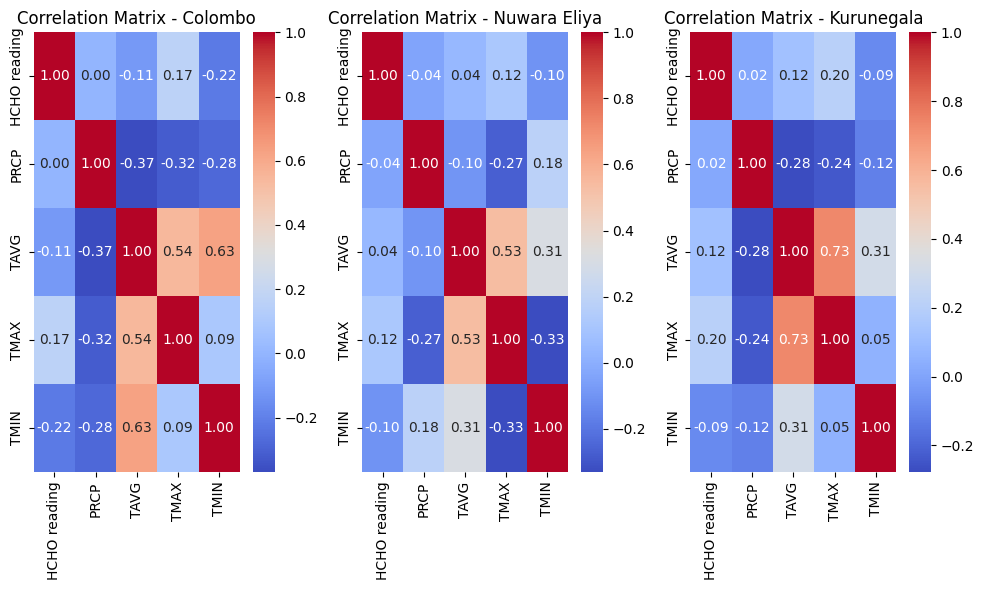

In [ ]:
# Selects relevant columns
colombo_data = colombo_merged[['HCHO reading', 'PRCP', 'TAVG', 'TMAX', 'TMIN']]
nuwara_eliya_data = nuwara_eliya_merged[['HCHO reading', 'PRCP', 'TAVG', 'TMAX', 'TMIN']]
kurunegala_data = kurunegala_merged[['HCHO reading', 'PRCP', 'TAVG', 'TMAX', 'TMIN']]

# Calculates correlation matrices
colombo_corr = colombo_data.corr()
nuwara_eliya_corr = nuwara_eliya_data.corr()
kurunegala_corr = kurunegala_data.corr()

# Plots heatmaps
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.heatmap(colombo_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Colombo')

plt.subplot(1, 3, 2)
sns.heatmap(nuwara_eliya_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Nuwara Eliya')

plt.subplot(1, 3, 3)
sns.heatmap(kurunegala_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Kurunegala')

plt.tight_layout()
plt.show()

In [ ]:
# Reads the second CSV file
df_weather = pd.read_csv("sri_lanka_weather.csv")

In [ ]:
df_weather.drop(columns=['snowfall_sum'], inplace=True)
df_weather.drop(columns=['country'], inplace=True)
df_weather.drop(columns=['weathercode'], inplace=True)
df_weather.drop(columns=['shortwave_radiation_sum'], inplace=True)
df_weather.drop(columns=['precipitation_hours'], inplace=True)
df_weather.drop(columns=['et0_fao_evapotranspiration'], inplace=True)
df_weather.drop(columns=['sunrise'], inplace=True)
df_weather.drop(columns=['sunset'], inplace=True)

df_weather['city'] = df_weather['city'].replace('Matara', 'Deniyaya, Matara')
df_weather['city'] = df_weather['city'].replace('Jaffna', 'Jaffna Proper')
df_weather['city'] = df_weather['city'].replace('Kandy', 'Kandy Proper')

# Filters the DataFrame to keep only the desired cities
desired_cities = ['Jaffna Proper', 'Deniyaya, Matara', 'Kandy Proper']
filtered_df = df_weather[df_weather['city'].isin(desired_cities)]

# Converts the 'time' column to datetime format
filtered_df['time'] = pd.to_datetime(filtered_df['time'])

# Filters the weather DataFrame to include only dates from 2019 onwards
deniyaya_weather = filtered_df[(filtered_df['city'] == 'Deniyaya, Matara') & (filtered_df['time'] >= '2019-01-01')]
jaffna_weather = filtered_df[(filtered_df['city'] == 'Jaffna Proper') & (filtered_df['time'] >= '2019-01-01')]
kandy_weather = filtered_df[(filtered_df['city'] == 'Kandy Proper') & (filtered_df['time'] >= '2019-01-01')]

# Combines all three DataFrames
sri_lanka_weather_combined = pd.concat([deniyaya_weather, jaffna_weather, kandy_weather])

# Saves the combined DataFrame to a CSV file
sri_lanka_weather_combined.to_csv("sri_lanka_weather.csv", index=False)

In [ ]:
# Loads the CSV files for each city
deniyaya_df = pd.read_csv("Deniyaya__Matara.csv")
jaffna_df = pd.read_csv("Jaffna_Proper.csv")
kandy_df = pd.read_csv("Kandy_Proper.csv")
sri_lanka_weather_df = pd.read_csv("sri_lanka_weather.csv")

In [ ]:
# Filters the weather DataFrame for each city
deniyaya_weather = sri_lanka_weather_df[sri_lanka_weather_df['city'] == 'Deniyaya, Matara']
jaffna_weather = sri_lanka_weather_df[sri_lanka_weather_df['city'] == 'Jaffna Proper']
kandy_weather = sri_lanka_weather_df[sri_lanka_weather_df['city'] == 'Kandy Proper']

# Merges the HCHO readings DataFrame with the filtered weather DataFrame for each city
deniyaya_merged = pd.merge(deniyaya_df, deniyaya_weather, left_on="Current Date", right_on="time", how="left")
jaffna_merged = pd.merge(jaffna_df, jaffna_weather, left_on="Current Date", right_on="time", how="left")
kandy_merged = pd.merge(kandy_df, kandy_weather, left_on="Current Date", right_on="time", how="left")

# Drops the 'NAME' and 'DATE' columns
deniyaya_merged.drop(columns=['time', 'city'], inplace=True)
jaffna_merged.drop(columns=['time', 'city'], inplace=True)
kandy_merged.drop(columns=['time', 'city'], inplace=True)

deniyaya_merged = deniyaya_merged[deniyaya_merged['Current Date'] <= '2023-06-17']
jaffna_merged = jaffna_merged[jaffna_merged['Current Date'] <= '2023-06-17']
kandy_merged = kandy_merged[kandy_merged['Current Date'] <= '2023-06-17']

# Saves the merged DataFrames back to CSV files
deniyaya_merged.to_csv("deniyaya_merged.csv", index=False)
jaffna_merged.to_csv("jaffna_merged.csv", index=False)
kandy_merged.to_csv("kandy_merged.csv", index=False)

In [ ]:
# Loads the merged CSV files
deniyaya_merged = pd.read_csv("deniyaya_merged.csv")
jaffna_merged = pd.read_csv("jaffna_merged.csv")
kandy_merged = pd.read_csv("kandy_merged.csv")

In [ ]:
# Defines the data for each heatmap
heatmap_data = [
    ['HCHO reading', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum'],
    ['HCHO reading', 'apparent_temperature_max', 'apparent_temperature_min', 'windspeed_10m_max'],
    ['HCHO reading', 'temperature_2m_mean', 'precipitation_sum', 'windgusts_10m_max'],
    ['HCHO reading','apparent_temperature_mean','rain_sum','winddirection_10m_dominant']
]

In [ ]:
# Plots the heatmaps
plt.figure(figsize=(15, 10))
for i, data in enumerate(heatmap_data, 1):
    plt.subplot(2, 2, i)
    sns.heatmap(deniyaya_merged[data].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix {i} - Deniyaya Matara')
    plt.xlabel('Attributes')
    plt.ylabel('Attributes')
plt.tight_layout()
plt.show()

In [ ]:
# Plots the heatmaps
plt.figure(figsize=(15, 10))
for i, data in enumerate(heatmap_data, 1):
    plt.subplot(2, 2, i)
    sns.heatmap(jaffna_merged[data].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix {i} - Jaffna')
    plt.xlabel('Attributes')
    plt.ylabel('Attributes')
plt.tight_layout()
plt.show()

In [ ]:
# Plots the heatmaps
plt.figure(figsize=(15, 10))
for i, data in enumerate(heatmap_data, 1):
    plt.subplot(2, 2, i)
    sns.heatmap(kandy_merged[data].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix {i} - Kandy')
    plt.xlabel('Attributes')
    plt.ylabel('Attributes')
plt.tight_layout()
plt.show()

In [20]:
# Loads the preprocessed Bibile dataset
bibile_data = pd.read_csv("Bibile__Monaragala.csv")

# Adds altitude and population density columns
bibile_data['Altitude'] = 268
bibile_data['Population Density'] = 74.4

# Saves the merged dataset to a new CSV file
bibile_data.to_csv("bibile_merged.csv", index=False)

**Task 3**

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

Model for Colombo

In [4]:
colombo_df = pd.read_csv("colombo_merged.csv")

# Converts 'Current Date' column to datetime and set it as index
colombo_df['Current Date'] = pd.to_datetime(colombo_df['Current Date'])
colombo_df.set_index('Current Date', inplace=True)

# Filters the data to include only 'HCHO reading' and 'TMIN' columns
colombo_data = colombo_df[['HCHO reading', 'TMIN']]

# Splits the data into train and test sets
train_size_colombo = int(len(colombo_data) * 0.8)
train_colombo, test_colombo = colombo_data[:train_size_colombo], colombo_data[train_size_colombo:]

# Uses auto_arima to find the optimal parameters
model_colombo = auto_arima(train_colombo['HCHO reading'], seasonal=False, trace=True)

# Gets the optimal parameters
p, d, q = model_colombo.order

print(p, d, q)

# Fits the ARIMA model with the optimal parameters
fitted_model_colombo = ARIMA(train_colombo['HCHO reading'], exog=train_colombo[['TMIN']], order=(p, d, q)).fit()

# Generates predictions using the fitted model
predictions_colombo = fitted_model_colombo.forecast(steps=len(test_colombo), exog=test_colombo[['TMIN']])

# Calculates evaluation metrics
mse = mean_squared_error(test_colombo['HCHO reading'], predictions_colombo)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_colombo['HCHO reading'], predictions_colombo)

# Prints the evaluation metrics
print(f"Mean Squared Error (MSE) for Colombo: {mse}")
print(f"Root Mean Squared Error (RMSE) for Colombo: {rmse}")
print(f"Mean Absolute Error (MAE) for Colombo: {mae}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-22916.835, Time=2.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22227.186, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22567.221, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22865.297, Time=13.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22229.197, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-22914.674, Time=2.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-22869.045, Time=10.01 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-22909.710, Time=2.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-22918.291, Time=1.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-22213.463, Time=2.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-22209.412, Time=4.22 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-22948.727, Time=5.40 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-22953.722, Time=1.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-22964.083, Time=1.32 sec
 AR

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (MSE) for Colombo: 4.434929874265768e-09
Root Mean Squared Error (RMSE) for Colombo: 6.659526915829508e-05
Mean Absolute Error (MAE) for Colombo: 4.663337567988556e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
# Generates predictions for the next 30 days
start_date_colombo = colombo_df.index[-1] + pd.Timedelta(days=1)
end_date_colombo = start_date_colombo + pd.Timedelta(days=29)
future_dates_colombo = pd.date_range(start=start_date_colombo, end=end_date_colombo)

# Extracts the exogenous variable for the forecast period
exog_forecast_colombo = colombo_df.loc['2023-12-31':'2024-01-30', ['TMIN']].values.reshape(-1, 1)

# Ensures the exog_forecast has the correct shape
exog_forecast_colombo = np.repeat(exog_forecast_colombo, len(future_dates_colombo), axis=0)

# Forecasts future values
forecast_colombo = fitted_model_colombo.forecast(steps=len(future_dates_colombo), exog=exog_forecast_colombo)

# Creates a DataFrame to store the predicted values
future_df_colombo = pd.DataFrame({'Date': future_dates_colombo, 'Predicted HCHO reading': forecast_colombo, 'Location': "Colombo"})


future_df_colombo.to_csv("colombo_predicted.csv", index=False)

print("Prediction of HCHO reading in Colombo from 2024-01-01 - 2024-01-30")

# Prints the predicted values
print(future_df_colombo)

Prediction of HCHO reading in Colombo from 2024-01-01 - 2024-01-30
           Date  Predicted HCHO reading Location
1395 2024-01-01                0.000158  Colombo
1396 2024-01-02                0.000161  Colombo
1397 2024-01-03                0.000163  Colombo
1398 2024-01-04                0.000165  Colombo
1399 2024-01-05                0.000165  Colombo
1400 2024-01-06                0.000165  Colombo
1401 2024-01-07                0.000165  Colombo
1402 2024-01-08                0.000165  Colombo
1403 2024-01-09                0.000165  Colombo
1404 2024-01-10                0.000165  Colombo
1405 2024-01-11                0.000165  Colombo
1406 2024-01-12                0.000165  Colombo
1407 2024-01-13                0.000165  Colombo
1408 2024-01-14                0.000165  Colombo
1409 2024-01-15                0.000165  Colombo
1410 2024-01-16                0.000165  Colombo
1411 2024-01-17                0.000165  Colombo
1412 2024-01-18                0.000165  Colombo
14

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model for Nuwara Eliya

In [6]:
# Reads the Nuwara Eliya merged CSV file
nuwara_eliya_df = pd.read_csv("nuwara_eliya_merged.csv")

# Converts 'Current Date' column to datetime and set it as index
nuwara_eliya_df['Current Date'] = pd.to_datetime(nuwara_eliya_df['Current Date'])
nuwara_eliya_df.set_index('Current Date', inplace=True)

# Filters the data to include only 'HCHO reading' and 'TMAX' columns
nuwara_eliya_data = nuwara_eliya_df[['HCHO reading', 'TMAX']]

# Splits the data into train and test sets
train_size_nuwara_eliya = int(len(nuwara_eliya_data) * 0.8)
train_nuwara_eliya, test_nuwara_eliya = nuwara_eliya_data[:train_size_nuwara_eliya], nuwara_eliya_data[train_size_nuwara_eliya:]

# Uses auto_arima to find the optimal parameters
model_nuwara_eliya = auto_arima(train_nuwara_eliya['HCHO reading'], seasonal=False, trace=True)

# Gets the optimal parameters
p, d, q = model_nuwara_eliya.order

print(p, d, q)

# Fits the ARIMA model with the optimal parameters
fitted_model_nuwara_eliya = ARIMA(train_nuwara_eliya['HCHO reading'], exog=train_nuwara_eliya[['TMAX']], order=(p, d, q)).fit()

# Generates predictions using the fitted model
predictions_nuwara_eliya = fitted_model_nuwara_eliya.forecast(steps=len(test_nuwara_eliya), exog=test_nuwara_eliya[['TMAX']])

# Calculates evaluation metrics
mse = mean_squared_error(test_nuwara_eliya['HCHO reading'], predictions_nuwara_eliya)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_nuwara_eliya['HCHO reading'], predictions_nuwara_eliya)

# Prints the evaluation metrics
print(f"Mean Squared Error (MSE) for Nuwara Eliya: {mse}")
print(f"Root Mean Squared Error (RMSE) for Nuwara Eliya: {rmse}")
print(f"Mean Absolute Error (MAE) for Nuwara Eliya: {mae}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-24419.887, Time=1.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23723.437, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23984.779, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24264.348, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-23723.799, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-24397.842, Time=13.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24313.587, Time=0.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-24419.889, Time=1.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-24260.178, Time=0.55 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-24453.638, Time=1.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-24431.016, Time=1.34 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-24449.567, Time=2.74 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-24453.055, Time=1.83 sec
 ARIMA(2,1,

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,5)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packag

 ARIMA(1,1,5)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(1,1,5)(0,0,0)[0] intercept
Total fit time: 50.480 seconds
1 1 5
Mean Squared Error (MSE) for Nuwara Eliya: 9.044350089895207e-10
Root Mean Squared Error (RMSE) for Nuwara Eliya: 3.0073825978573473e-05
Mean Absolute Error (MAE) for Nuwara Eliya: 1.615631389118908e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
# Generates predictions for the next 30 days
start_date_nuwara_eliya = nuwara_eliya_data.index[-1] + pd.Timedelta(days=1)
end_date_nuwara_eliya = start_date_nuwara_eliya + pd.Timedelta(days=29)
future_dates_nuwara_eliya = pd.date_range(start=start_date_nuwara_eliya, end=end_date_nuwara_eliya)

# Extracts the exogenous variable for the forecast period
exog_forecast_nuwara_eliya = nuwara_eliya_data.loc['2023-12-31':'2024-01-30', ['TMAX']].values.reshape(-1, 1)

# Ensures the exog_forecast has the correct shape
exog_forecast_nuwara_eliya = np.repeat(exog_forecast_nuwara_eliya, len(future_dates_nuwara_eliya), axis=0)

# Forecasts future values
forecast_nuwara_eliya = fitted_model_nuwara_eliya.forecast(steps=len(future_dates_nuwara_eliya), exog=exog_forecast_nuwara_eliya)

# Creates a DataFrame to store the predicted values
future_df_nuwara_eliya = pd.DataFrame({'Date': future_dates_nuwara_eliya, 'Predicted HCHO reading': forecast_nuwara_eliya , 'Location': "Nuwara Eliya"})

future_df_nuwara_eliya.to_csv("nuwara_eliya_predicted.csv", index=False)

print("Prediction of HCHO reading in Nuwara Eliya from 2024-01-01 - 2024-01-30")

# Prints the predicted values
print(future_df_nuwara_eliya)

Prediction of HCHO reading in Nuwara Eliya from 2024-01-01 - 2024-01-30
           Date  Predicted HCHO reading      Location
1375 2024-01-01                0.000073  Nuwara Eliya
1376 2024-01-02                0.000084  Nuwara Eliya
1377 2024-01-03                0.000083  Nuwara Eliya
1378 2024-01-04                0.000083  Nuwara Eliya
1379 2024-01-05                0.000086  Nuwara Eliya
1380 2024-01-06                0.000084  Nuwara Eliya
1381 2024-01-07                0.000085  Nuwara Eliya
1382 2024-01-08                0.000084  Nuwara Eliya
1383 2024-01-09                0.000085  Nuwara Eliya
1384 2024-01-10                0.000084  Nuwara Eliya
1385 2024-01-11                0.000085  Nuwara Eliya
1386 2024-01-12                0.000084  Nuwara Eliya
1387 2024-01-13                0.000085  Nuwara Eliya
1388 2024-01-14                0.000084  Nuwara Eliya
1389 2024-01-15                0.000085  Nuwara Eliya
1390 2024-01-16                0.000085  Nuwara Eliya
1391 2024-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model for Kurunegala

In [10]:
# Reads the Kurunegala merged CSV file
kurunegala_df = pd.read_csv("kurunegala_merged.csv")

# Converts 'Current Date' column to datetime and set it as index
kurunegala_df['Current Date'] = pd.to_datetime(kurunegala_df['Current Date'])
kurunegala_df.set_index('Current Date', inplace=True)

# Filters the data to include only 'HCHO reading' and 'TMAX' columns
kurunegala_data = kurunegala_df[['HCHO reading', 'TMAX']]

# Splits the data into train and test sets
train_size_kurunegala = int(len(kurunegala_data) * 0.8)
train_kurunegala, test_kurunegala = kurunegala_data[:train_size_kurunegala], kurunegala_data[train_size_kurunegala:]

# Uses auto_arima to find the optimal parameters
model_kurunegala = auto_arima(train_kurunegala['HCHO reading'], seasonal=False, trace=True)

# Gets the optimal parameters
p, d, q = model_kurunegala.order

print(p, d, q)

# Fits the ARIMA model with the optimal parameters
fitted_model_kurunegala = ARIMA(train_kurunegala['HCHO reading'], exog=train_kurunegala[['TMAX']], order=(p, d, q)).fit()

# Generates predictions using the fitted model
predictions_kurunegala = fitted_model_kurunegala.forecast(steps=len(test_kurunegala), exog=test_kurunegala[['TMAX']])

# Calculates evaluation metrics
mse = mean_squared_error(test_kurunegala['HCHO reading'], predictions_kurunegala)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_kurunegala['HCHO reading'], predictions_kurunegala)

# Prints the evaluation metrics
print(f"Mean Squared Error (MSE) for Kurunegala: {mse}")
print(f"Root Mean Squared Error (RMSE) for Kurunegala: {rmse}")
print(f"Mean Absolute Error (MAE) for Kurunegala: {mae}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-22575.229, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21817.637, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22145.286, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22486.129, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21819.171, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-22565.549, Time=0.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-22528.441, Time=0.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-22550.206, Time=1.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-22589.930, Time=3.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-22586.387, Time=2.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-22587.797, Time=4.96 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-22589.573, Time=3.90 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-22588.811, Time=3.34 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-22585.886, Time=15.89 sec
 ARI

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE) for Kurunegala: 3.079070548332824e-09
Root Mean Squared Error (RMSE) for Kurunegala: 5.548937329194505e-05
Mean Absolute Error (MAE) for Kurunegala: 3.9145339162158474e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
# Generates predictions for the next 30 days
start_date_kurunegala = kurunegala_data.index[-1] + pd.Timedelta(days=1)
end_date_kurunegala = start_date_kurunegala + pd.Timedelta(days=29)
future_dates_kurunegala = pd.date_range(start=start_date_kurunegala, end=end_date_kurunegala)

# Extracts the exogenous variable for the forecast period
exog_forecast_kurunegala = kurunegala_data.loc['2023-12-31':'2024-01-30', ['TMAX']].values.reshape(-1, 1)

# Ensures the exog_forecast has the correct shape
exog_forecast_kurunegala = np.repeat(exog_forecast_kurunegala, len(future_dates_kurunegala), axis=0)

# Forecasts future values
forecast_kurunegala = fitted_model_kurunegala.forecast(steps=len(future_dates_kurunegala), exog=exog_forecast_kurunegala)

# Creates a DataFrame to store the predicted values
future_df_kurunegala = pd.DataFrame({'Date': future_dates_kurunegala, 'Predicted HCHO reading': forecast_kurunegala, 'Location': "Kurunegala"})

future_df_kurunegala.to_csv("kurunegala_predicted.csv", index=False)

print("Prediction of HCHO reading in Kurunegala from 2024-01-01 to 2024-01-30")

# Prints the predicted values
print(future_df_kurunegala)

Prediction of HCHO reading in Kurunegala from 2024-01-01 to 2024-01-30
           Date  Predicted HCHO reading    Location
1342 2024-01-01                0.000130  Kurunegala
1343 2024-01-02                0.000127  Kurunegala
1344 2024-01-03                0.000129  Kurunegala
1345 2024-01-04                0.000130  Kurunegala
1346 2024-01-05                0.000128  Kurunegala
1347 2024-01-06                0.000129  Kurunegala
1348 2024-01-07                0.000129  Kurunegala
1349 2024-01-08                0.000129  Kurunegala
1350 2024-01-09                0.000129  Kurunegala
1351 2024-01-10                0.000129  Kurunegala
1352 2024-01-11                0.000129  Kurunegala
1353 2024-01-12                0.000129  Kurunegala
1354 2024-01-13                0.000129  Kurunegala
1355 2024-01-14                0.000129  Kurunegala
1356 2024-01-15                0.000129  Kurunegala
1357 2024-01-16                0.000129  Kurunegala
1358 2024-01-17                0.000129  Kuru

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model for Deniyaya

In [12]:
# Reads the Deniyaya merged CSV file
deniyaya_df = pd.read_csv("deniyaya_merged.csv")

# Converts 'Current Date' column to datetime and set it as index
deniyaya_df['Current Date'] = pd.to_datetime(deniyaya_df['Current Date'])
deniyaya_df.set_index('Current Date', inplace=True)

# Filters the data to include only 'HCHO reading' and 'temperature_2m_max' columns
deniyaya_data = deniyaya_df[['HCHO reading', 'temperature_2m_max']]

# Splits the data into train and test sets
train_size_deniyaya = int(len(deniyaya_data) * 0.8)
train_deniyaya, test_deniyaya = deniyaya_data[:train_size_deniyaya], deniyaya_data[train_size_deniyaya:]

# Uses auto_arima to find the optimal parameters
model_deniyaya = auto_arima(train_deniyaya['HCHO reading'], seasonal=False, trace=True)

# Gets the optimal parameters
p, d, q = model_deniyaya.order

print(p, d, q)

# Fits the ARIMA model with the optimal parameters
fitted_model_deniyaya = ARIMA(train_deniyaya['HCHO reading'], exog=train_deniyaya[['temperature_2m_max']], order=(p, d, q)).fit()

# Generates predictions using the fitted model
predictions_deniyaya = fitted_model_deniyaya.forecast(steps=len(test_deniyaya), exog=test_deniyaya[['temperature_2m_max']])

# Calculates evaluation metrics
mse = mean_squared_error(test_deniyaya['HCHO reading'], predictions_deniyaya)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_deniyaya['HCHO reading'], predictions_deniyaya)

# Prints the evaluation metrics
print(f"Mean Squared Error (MSE) for Deniyaya: {mse}")
print(f"Root Mean Squared Error (RMSE) for Deniyaya: {rmse}")
print(f"Mean Absolute Error (MAE) for Deniyaya: {mae}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-21562.970, Time=3.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-19804.319, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-21414.030, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-20383.909, Time=0.58 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-20858.222, Time=3.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-21859.774, Time=1.36 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-21861.363, Time=0.71 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-20480.311, Time=0.69 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-21674.527, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-22096.373, Time=0.63 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-22096.547, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-22091.718, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-22091.252, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-22098.307, Time=0.72 sec
 ARIM

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (MSE) for Deniyaya: 1.7601211655135801e-09
Root Mean Squared Error (RMSE) for Deniyaya: 4.195379798675658e-05
Mean Absolute Error (MAE) for Deniyaya: 2.5594295307853274e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [13]:
# Generates predictions for the next 30 days starting from June 18, 2023
start_date_deniyaya = deniyaya_data.index[-1] + pd.Timedelta(days=1)
end_date_deniyaya = pd.to_datetime(start_date_deniyaya) + pd.Timedelta(days=29)
future_dates_deniyaya = pd.date_range(start=start_date_deniyaya, end=end_date_deniyaya)

# Extracts the exogenous variable for the forecast period
exog_forecast_deniyaya = deniyaya_data.loc['2023-06-17':'2023-07-16', ['temperature_2m_max']].values.reshape(-1, 1)

# Ensures the exog_forecast has the correct shape
exog_forecast_deniyaya = np.repeat(exog_forecast_deniyaya, len(future_dates_deniyaya), axis=0)

# Forecasts future values
forecast_deniyaya = fitted_model_deniyaya.forecast(steps=len(future_dates_deniyaya), exog=exog_forecast_deniyaya)

# Creates a DataFrame to store the predicted values
future_df_deniyaya = pd.DataFrame({'Date': future_dates_deniyaya, 'Predicted HCHO reading': forecast_deniyaya, 'Location': "Deniyaya"})

future_df_deniyaya.to_csv("deniyaya_predicted.csv", index=False)

print("Prediction of HCHO reading in Deniyaya from 2023-06-18 to 2023-07-17")

# Prints the predicted values
print(future_df_deniyaya)

Prediction of HCHO reading in Deniyaya from 2023-06-18 to 2023-07-17
           Date  Predicted HCHO reading  Location
1280 2023-06-18                0.000094  Deniyaya
1281 2023-06-19                0.000094  Deniyaya
1282 2023-06-20                0.000094  Deniyaya
1283 2023-06-21                0.000094  Deniyaya
1284 2023-06-22                0.000094  Deniyaya
1285 2023-06-23                0.000094  Deniyaya
1286 2023-06-24                0.000094  Deniyaya
1287 2023-06-25                0.000094  Deniyaya
1288 2023-06-26                0.000094  Deniyaya
1289 2023-06-27                0.000094  Deniyaya
1290 2023-06-28                0.000094  Deniyaya
1291 2023-06-29                0.000094  Deniyaya
1292 2023-06-30                0.000094  Deniyaya
1293 2023-07-01                0.000094  Deniyaya
1294 2023-07-02                0.000094  Deniyaya
1295 2023-07-03                0.000094  Deniyaya
1296 2023-07-04                0.000094  Deniyaya
1297 2023-07-05                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model for Jaffna

In [15]:
# Reads the Jaffna merged CSV file
jaffna_df = pd.read_csv("jaffna_merged.csv")

# Converts 'Current Date' column to datetime and set it as index
jaffna_df['Current Date'] = pd.to_datetime(jaffna_df['Current Date'])
jaffna_df.set_index('Current Date', inplace=True)

# Filters the data to include only 'HCHO reading' and 'apparent_temperature_max' columns
jaffna_data = jaffna_df[['HCHO reading', 'apparent_temperature_max']]

# Splits the data into train and test sets
train_size_jaffna = int(len(jaffna_data) * 0.8)
train_jaffna, test_jaffna = jaffna_data[:train_size_jaffna], jaffna_data[train_size_jaffna:]

# Uses auto_arima to find the optimal parameters
model_jaffna = auto_arima(train_jaffna['HCHO reading'], seasonal=False, trace=True)

# Gets the optimal parameters
p, d, q = model_jaffna.order

print(p, d, q)

# Fits the ARIMA model with the optimal parameters
fitted_model_jaffna = ARIMA(train_jaffna['HCHO reading'], exog=train_jaffna[['apparent_temperature_max']], order=(p, d, q)).fit()

# Generates predictions using the fitted model
predictions_jaffna = fitted_model_jaffna.forecast(steps=len(test_jaffna), exog=test_jaffna[['apparent_temperature_max']])

# Calculates evaluation metrics
mse = mean_squared_error(test_jaffna['HCHO reading'], predictions_jaffna)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_jaffna['HCHO reading'], predictions_jaffna)

# Prints the evaluation metrics
print(f"Mean Squared Error (MSE) for Jaffna: {mse}")
print(f"Root Mean Squared Error (RMSE) for Jaffna: {rmse}")
print(f"Mean Absolute Error (MAE) for Jaffna: {mae}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-21545.114, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-19506.120, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-21059.123, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-20095.078, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-15412.445, Time=1.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-21461.428, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-15968.998, Time=2.61 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-19496.121, Time=1.85 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-21466.703, Time=0.73 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12883.042, Time=1.60 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-21388.763, Time=0.59 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-21572.687, Time=1.29 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-16644.894, Time=1.99 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-16098.995, Time=1.58 sec
 ARIM

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

Mean Squared Error (MSE) for Jaffna: 2.7306064223916924e-09
Root Mean Squared Error (RMSE) for Jaffna: 5.2255204739735664e-05
Mean Absolute Error (MAE) for Jaffna: 3.878523071395916e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
# Generates predictions for the next 30 days starting from June 18, 2023
start_date_jaffna = jaffna_data.index[-1] + pd.Timedelta(days=1)
end_date_jaffna = pd.to_datetime(start_date_jaffna) + pd.Timedelta(days=29)
future_dates_jaffna = pd.date_range(start=start_date_jaffna, end=end_date_jaffna)

# Extracts the exogenous variable for the forecast period
exog_forecast_jaffna = jaffna_data.loc['2023-06-17':'2023-07-16', ['apparent_temperature_max']].values.reshape(-1, 1)

# Ensures the exog_forecast has the correct shape
exog_forecast_jaffna = np.repeat(exog_forecast_jaffna, len(future_dates_jaffna), axis=0)

# Forecasts future values
forecast_jaffna = fitted_model_jaffna.forecast(steps=len(future_dates_jaffna), exog=exog_forecast_jaffna)

# Creates a DataFrame to store the predicted values
future_df_jaffna = pd.DataFrame({'Date': future_dates_jaffna, 'Predicted HCHO reading': forecast_jaffna, 'Location': "Jaffna"})

future_df_jaffna.to_csv("jaffna_predicted.csv", index=False)

print("Prediction of HCHO reading in Jaffna from 2023-06-18 to 2023-07-17")

# Prints the predicted values
print(future_df_jaffna)

Prediction of HCHO reading in Jaffna from 2023-06-18 to 2023-07-17
           Date  Predicted HCHO reading Location
1283 2023-06-18                0.000106   Jaffna
1284 2023-06-19                0.000122   Jaffna
1285 2023-06-20                0.000118   Jaffna
1286 2023-06-21                0.000118   Jaffna
1287 2023-06-22                0.000115   Jaffna
1288 2023-06-23                0.000120   Jaffna
1289 2023-06-24                0.000118   Jaffna
1290 2023-06-25                0.000118   Jaffna
1291 2023-06-26                0.000118   Jaffna
1292 2023-06-27                0.000118   Jaffna
1293 2023-06-28                0.000118   Jaffna
1294 2023-06-29                0.000118   Jaffna
1295 2023-06-30                0.000118   Jaffna
1296 2023-07-01                0.000118   Jaffna
1297 2023-07-02                0.000118   Jaffna
1298 2023-07-03                0.000118   Jaffna
1299 2023-07-04                0.000118   Jaffna
1300 2023-07-05                0.000118   Jaffna
13

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model for Kandy

In [17]:
# Reads the Kandy merged CSV file
kandy_df = pd.read_csv("kandy_merged.csv")

# Converts 'Current Date' column to datetime and set it as index
kandy_df['Current Date'] = pd.to_datetime(kandy_df['Current Date'])
kandy_df.set_index('Current Date', inplace=True)

# Filters the data to include only 'HCHO reading' and 'temperature_2m_max' columns
kandy_data = kandy_df[['HCHO reading', 'temperature_2m_max']]

# Splits the data into train and test sets
train_size_kandy = int(len(kandy_data) * 0.8)
train_kandy, test_kandy = kandy_data[:train_size_kandy], kandy_data[train_size_kandy:]

# Uses auto_arima to find the optimal parameters
model_kandy = auto_arima(train_kandy['HCHO reading'], seasonal=False, trace=True)

# Gets the optimal parameters
p, d, q = model_kandy.order

print(p, d, q)

# Fits the ARIMA model with the optimal parameters
fitted_model_kandy = ARIMA(train_kandy['HCHO reading'], exog=train_kandy[['temperature_2m_max']], order=(p, d, q)).fit()

# Generates predictions using the fitted model
predictions_kandy = fitted_model_kandy.forecast(steps=len(test_kandy), exog=test_kandy[['temperature_2m_max']])

# Calculates evaluation metrics
mse = mean_squared_error(test_kandy['HCHO reading'], predictions_kandy)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_kandy['HCHO reading'], predictions_kandy)

# Prints the evaluation metrics
print(f"Mean Squared Error (MSE) for Kandy: {mse}")
print(f"Root Mean Squared Error (RMSE) for Kandy: {rmse}")
print(f"Mean Absolute Error (MAE) for Kandy: {mae}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21803.073, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21164.450, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21490.482, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-21762.833, Time=7.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21166.350, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-21804.867, Time=2.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-21814.308, Time=13.80 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-21827.962, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-21148.712, Time=2.92 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-21856.015, Time=3.74 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-21845.379, Time=3.25 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-21857.307, Time=3.39 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-21853.742, Time=5.39 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=-21709.476, Time=0.41 sec

Bes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (MSE) for Kandy: 2.0069811116220844e-09
Root Mean Squared Error (RMSE) for Kandy: 4.4799342758818286e-05
Mean Absolute Error (MAE) for Kandy: 2.8981143970083514e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [18]:
# Generates predictions for the next 30 days starting from June 18, 2023
start_date_kandy = kandy_data.index[-1] + pd.Timedelta(days=1)
end_date_kandy = pd.to_datetime(start_date_kandy) + pd.Timedelta(days=29)
future_dates_kandy = pd.date_range(start=start_date_kandy, end=end_date_kandy)

# Extracts the exogenous variable for the forecast period
exog_forecast_kandy = kandy_data.loc['2023-06-17':'2023-07-16', ['temperature_2m_max']].values.reshape(-1, 1)

# Ensures the exog_forecast has the correct shape
exog_forecast_kandy = np.repeat(exog_forecast_kandy, len(future_dates_kandy), axis=0)

# Forecasts future values
forecast_kandy = fitted_model_kandy.forecast(steps=len(future_dates_kandy), exog=exog_forecast_kandy)

# Creates a DataFrame to store the predicted values
future_df_kandy = pd.DataFrame({'Date': future_dates_kandy, 'Predicted HCHO reading': forecast_kandy, 'Location': "Kandy"})

future_df_kandy.to_csv("kandy_predicted.csv", index=False)

print("Prediction of HCHO reading in Kandy from 2023-06-18 to 2023-07-17")

# Prints the predicted values
print(future_df_kandy)

Prediction of HCHO reading in Kandy from 2023-06-18 to 2023-07-17
           Date  Predicted HCHO reading Location
1280 2023-06-18                0.000126    Kandy
1281 2023-06-19                0.000121    Kandy
1282 2023-06-20                0.000112    Kandy
1283 2023-06-21                0.000113    Kandy
1284 2023-06-22                0.000113    Kandy
1285 2023-06-23                0.000113    Kandy
1286 2023-06-24                0.000113    Kandy
1287 2023-06-25                0.000113    Kandy
1288 2023-06-26                0.000113    Kandy
1289 2023-06-27                0.000113    Kandy
1290 2023-06-28                0.000113    Kandy
1291 2023-06-29                0.000113    Kandy
1292 2023-06-30                0.000113    Kandy
1293 2023-07-01                0.000113    Kandy
1294 2023-07-02                0.000113    Kandy
1295 2023-07-03                0.000113    Kandy
1296 2023-07-04                0.000113    Kandy
1297 2023-07-05                0.000113    Kandy
129

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model for Bibile

In [20]:
# Loads the preprocessed data
bibile_data = pd.read_csv("Bibile__Monaragala.csv")

# Converts the 'Current Date' column to datetime object
bibile_data['Current Date'] = pd.to_datetime(bibile_data['Current Date'])

# Sets 'Current Date' as the index
bibile_data.set_index('Current Date', inplace=True)

# Splits the data into train and test sets
train_size_bibile = int(len(bibile_data) * 0.8)
train_bibile, test_bibile = bibile_data[:train_size_bibile], bibile_data[train_size_bibile:]

# Finds the best ARIMA model using auto_arima
bibile_model = auto_arima(train_bibile['HCHO reading'], seasonal=False, trace=True)

# Defines the best (p, d, q) values obtained from auto_arima
p, d, q = bibile_model.order

print(p, d, q)

# Trains the ARIMA model using the training data
bibile_fitted_model = ARIMA(train_bibile['HCHO reading'], order=(p, d, q)).fit()

# Generates predictions using the fitted model
predictions = bibile_fitted_model.forecast(steps=len(test_bibile))

# Calculates evaluation metrics
mse = mean_squared_error(test_bibile['HCHO reading'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_bibile['HCHO reading'], predictions)

# Prints the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-24176.836, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-21402.572, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-23564.920, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-22098.394, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16568.033, Time=1.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-24075.225, Time=0.76 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-17286.898, Time=1.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-16211.086, Time=1.48 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-24083.059, Time=0.67 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-13583.952, Time=3.75 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-23983.922, Time=0.62 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-17407.630, Time=2.49 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-24266.838, Time=2.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-24242.204, Time=2.00 sec
 ARIM

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (MSE): 2.677118279728439e-09
Root Mean Squared Error (RMSE): 5.1740876294554954e-05
Mean Absolute Error (MAE): 3.2617748432135165e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
# Generates predictions for the next 30 days
start_date_bibile = bibile_data.index[-1] + pd.Timedelta(days=1)
end_date_bibile = start_date_bibile + pd.Timedelta(days=29)
future_dates_bibile = pd.date_range(start=start_date_bibile, end=end_date_bibile)
forecast_bibile = bibile_fitted_model.forecast(steps=30)

# Creates a DataFrame to store the predicted values
future_df_bibile = pd.DataFrame({'Date': future_dates_bibile, 'Predicted HCHO reading': forecast_bibile, 'Location': "Bibile"})

future_df_bibile.to_csv("bibile_predicted.csv", index=False)

print("Prediction of HCHO reading in Bibile from 2024-01-01 to 2024-01-30")

# Prints the predicted values
print(future_df_bibile)

Prediction of HCHO reading in Bibile from 2024-01-01 to 2024-01-30
           Date  Predicted HCHO reading Location
1436 2024-01-01                0.000112   Bibile
1437 2024-01-02                0.000115   Bibile
1438 2024-01-03                0.000114   Bibile
1439 2024-01-04                0.000116   Bibile
1440 2024-01-05                0.000116   Bibile
1441 2024-01-06                0.000117   Bibile
1442 2024-01-07                0.000118   Bibile
1443 2024-01-08                0.000119   Bibile
1444 2024-01-09                0.000119   Bibile
1445 2024-01-10                0.000120   Bibile
1446 2024-01-11                0.000121   Bibile
1447 2024-01-12                0.000121   Bibile
1448 2024-01-13                0.000122   Bibile
1449 2024-01-14                0.000122   Bibile
1450 2024-01-15                0.000123   Bibile
1451 2024-01-16                0.000123   Bibile
1452 2024-01-17                0.000123   Bibile
1453 2024-01-18                0.000124   Bibile
14

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
